In [3]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
cm = pd.read_csv('Churn_Modelling.csv')

In [5]:
cm.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
cm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
cm.tail

<bound method NDFrame.tail of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfPro

In [8]:
cm.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
cm.shape

(10000, 14)

In [11]:
cm.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
cm.describe(exclude= ['O'])
cm.describe(include = ['O'])

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [13]:
sns.set(style="white")

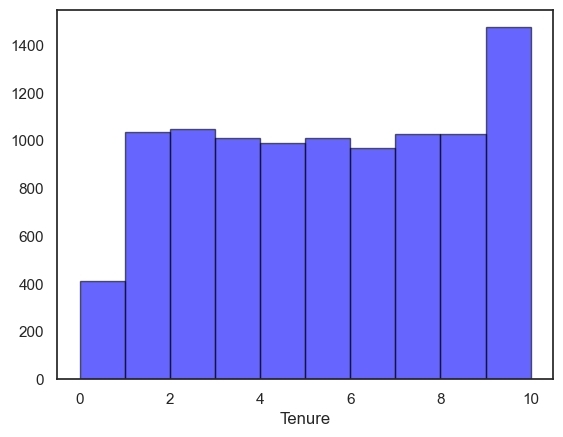

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Tenure', ylabel='Density'>

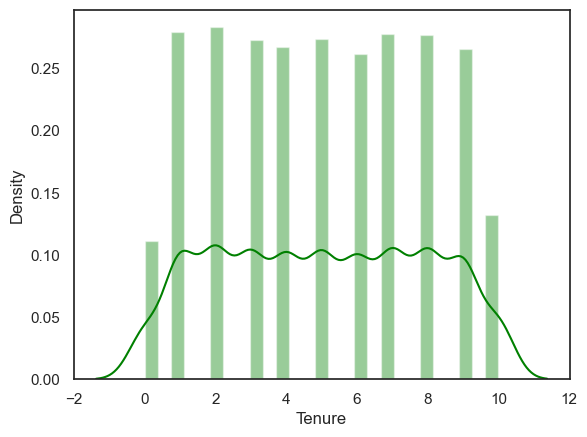

In [14]:
plt.hist(cm['Tenure'], color= 'blue', edgecolor = 'black', alpha = 0.6)
plt.xlabel('Tenure')
plt.show()

sns.distplot(cm['Tenure'], color= 'green')

In [16]:
cm.shape[0], cm.CustomerId.nunique()

(10000, 10000)

In [17]:
cm["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [18]:
cm.groupby(['Surname']).agg({'RowNumber':'count', 'Exited':'mean'}
).reset_index().sort_values(by='RowNumber', ascending=False).head()

,Surname,RowNumber,Exited
2473,Smith,32,0.281250
1689,Martin,29,0.310345
2389,Scott,29,0.103448
2751,Walker,28,0.142857
336,Brown,26,0.192308


In [19]:
cm.groupby(['Geography']).agg({'RowNumber':'count', 'Exited':'mean'}
).reset_index().sort_values(by='RowNumber', ascending=False)

,Geography,RowNumber,Exited
0,France,5014,0.161548
1,Germany,2509,0.324432
2,Spain,2477,0.166734


<AxesSubplot:ylabel='CreditScore'>

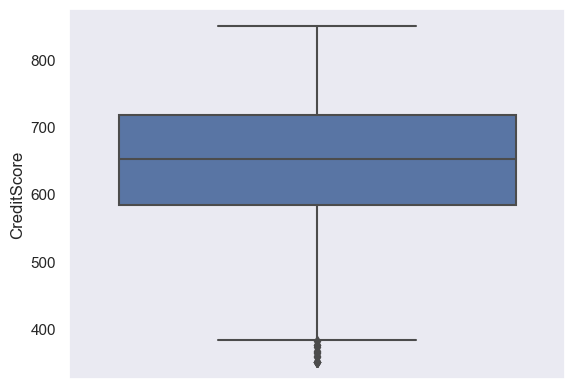

In [21]:
sns.set(style="dark")
sns.boxplot(y=cm['CreditScore'])


<AxesSubplot:ylabel='Age'>

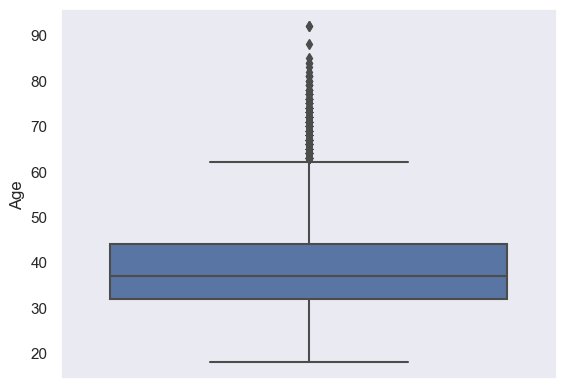

In [22]:
sns.boxplot(y=cm['Age'])

<AxesSubplot:ylabel='Tenure'>

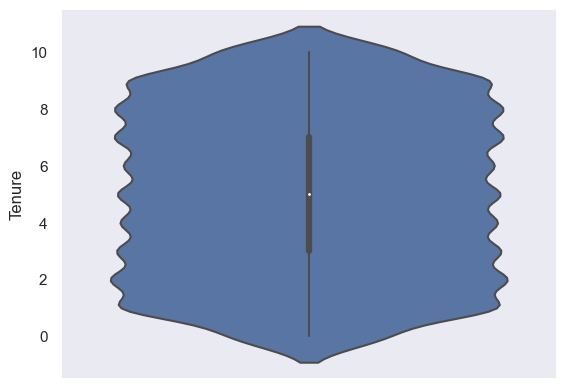

In [23]:
sns.violinplot(y = cm.Tenure)

<AxesSubplot:ylabel='Balance'>

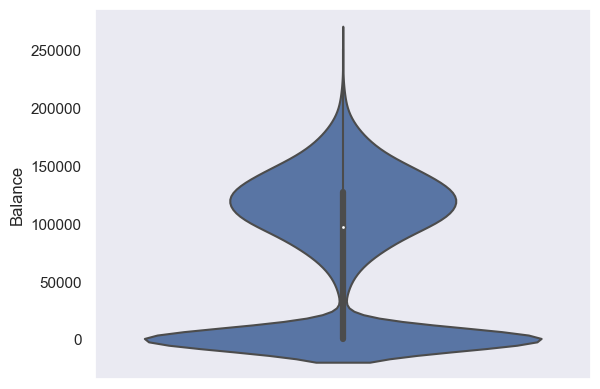

In [24]:
sns.violinplot(y = cm['Balance'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NumOfProducts'>

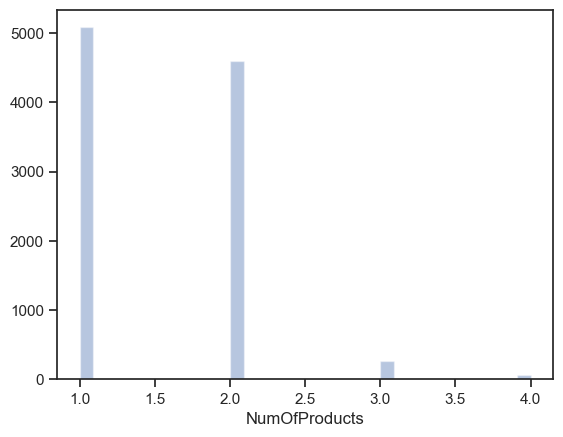

In [25]:
sns.set(style = 'ticks')
sns.distplot(cm.NumOfProducts, hist=True, kde=False)

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

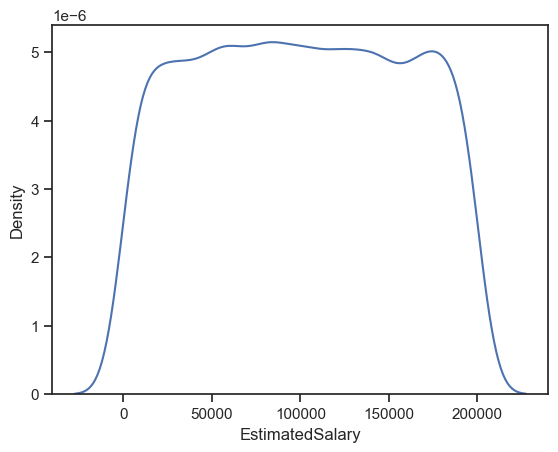

In [26]:
sns.kdeplot(cm.EstimatedSalary)

In [27]:
target_var = ['Exited']
cols_to_remove = ['RowNumber', 'CustomerId']

num_feats = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

cat_feats = ['Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

In [28]:
y = cm[target_var].values
cm.drop(cols_to_remove, axis=1, inplace=True)

In [29]:
cm_train_val, cm_test, y_train_val, y_test = train_test_split(cm, y.ravel(), test_size = 0.1, random_state = 42)

cm_train, cm_val, y_train, y_val = train_test_split(cm_train_val, y_train_val, test_size = 0.12, random_state = 42)
cm_train.shape, cm_val.shape, cm_test.shape, y_train.shape, y_val.shape, y_test.shape
np.mean(y_train), np.mean(y_val), np.mean(y_test)

(0.20303030303030303, 0.22037037037037038, 0.191)

In [30]:
le = LabelEncoder()
cm_train['Gender'] = le.fit_transform(cm_train['Gender'])
le_gender_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
le_gender_mapping

{'Female': 0, 'Male': 1}

In [31]:
cm_val['Gender'] = cm_val.Gender.map(le_gender_mapping)
cm_test['Gender'] = cm_test.Gender.map(le_gender_mapping)

cm_val['Gender'].fillna(-1, inplace=True)
cm_test['Gender'].fillna(-1, inplace=True)

In [32]:
cm_train.Gender.unique(), cm_val.Gender.unique(), cm_test.Gender.unique()

(array([1, 0]), array([1, 0]), array([1, 0]))

In [33]:
le_ohe = LabelEncoder()
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse=False)
enc_train = le_ohe.fit_transform(cm_train.Geography).reshape(cm_train.shape[0],1)
ohe_train = ohe.fit_transform(enc_train)
ohe_train

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [34]:
le_ohe_geography_mapping = dict(zip(le_ohe.classes_, le_ohe.transform(le_ohe.classes_)))
le_ohe_geography_mapping

{'France': 0, 'Germany': 1, 'Spain': 2}

In [35]:
enc_val = cm_val.Geography.map(le_ohe_geography_mapping).ravel().reshape(-1,1)
enc_test = cm_test.Geography.map(le_ohe_geography_mapping).ravel().reshape(-1,1)

enc_val[np.isnan(enc_val)] = 9999
enc_test[np.isnan(enc_test)] = 9999

In [36]:
ohe_val = ohe.transform(enc_val)
ohe_test = ohe.transform(enc_test)

In [37]:
ohe.transform(np.array([[999]]))

array([[0., 0., 0.]])

In [38]:
cols = ['country_' + str(x) for x in le_ohe_geography_mapping.keys()]
cols

['country_France', 'country_Germany', 'country_Spain']

In [40]:
cm_train = pd.concat([cm_train.reset_index(), pd.DataFrame(ohe_train, columns = cols)], axis = 1).drop(['index'], axis=1)
cm_val = pd.concat([cm_val.reset_index(), pd.DataFrame(ohe_val, columns = cols)], axis = 1).drop(['index'], axis=1)
cm_test = pd.concat([cm_test.reset_index(), pd.DataFrame(ohe_test, columns = cols)], axis = 1).drop(['index'], axis=1)
print("Training set")
cm_train.head()
print("\n\nValidation set")
cm_val.head()
print("\n\nTest set")
cm_test.head()

Training set


Validation set


Test set


,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain
0,Anderson,596,Germany,1,32,3,96709.07,2,0,0,41788.37,0,0.0,1.0,0.0
1,Herring,623,France,1,43,1,0.00,2,1,1,146379.30,0,1.0,0.0,0.0
2,Amechi,601,Spain,0,44,4,0.00,2,1,0,58561.31,0,0.0,0.0,1.0
3,Liang,506,Germany,1,59,8,119152.10,2,1,1,170679.74,0,0.0,1.0,0.0
4,Chuang,560,Spain,0,27,7,124995.98,1,1,1,114669.79,0,0.0,0.0,1.0


In [42]:
freqs = cm_train.groupby(['Surname']).size()
freqs.head()

Surname
Abazu       2
Abbie       1
Abbott      4
Abdullah    1
Abdulov     1
dtype: int64

In [46]:
corelation = cm.corr()

                 CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore         1.000000 -0.003965  0.000842  0.006268       0.012238   
Age                -0.003965  1.000000 -0.009997  0.028308      -0.030680   
Tenure              0.000842 -0.009997  1.000000 -0.012254       0.013444   
Balance             0.006268  0.028308 -0.012254  1.000000      -0.304180   
NumOfProducts       0.012238 -0.030680  0.013444 -0.304180       1.000000   
HasCrCard          -0.005458 -0.011721  0.022583 -0.014858       0.003183   
IsActiveMember      0.025651  0.085472 -0.028362 -0.010084       0.009612   
EstimatedSalary    -0.001384 -0.007201  0.007784  0.012797       0.014204   
Exited             -0.027094  0.285323 -0.014001  0.118533      -0.047820   

                 HasCrCard  IsActiveMember  EstimatedSalary    Exited  
CreditScore      -0.005458        0.025651        -0.001384 -0.027094  
Age              -0.011721        0.085472        -0.007201  0.285323  
Tenure       

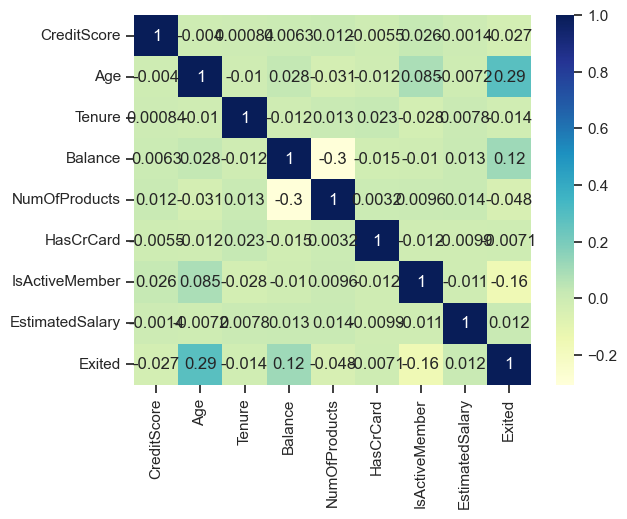

In [48]:
print(cm.corr())

dataplot = sns.heatmap(cm.corr(), cmap="YlGnBu", annot=True)

plt.show()

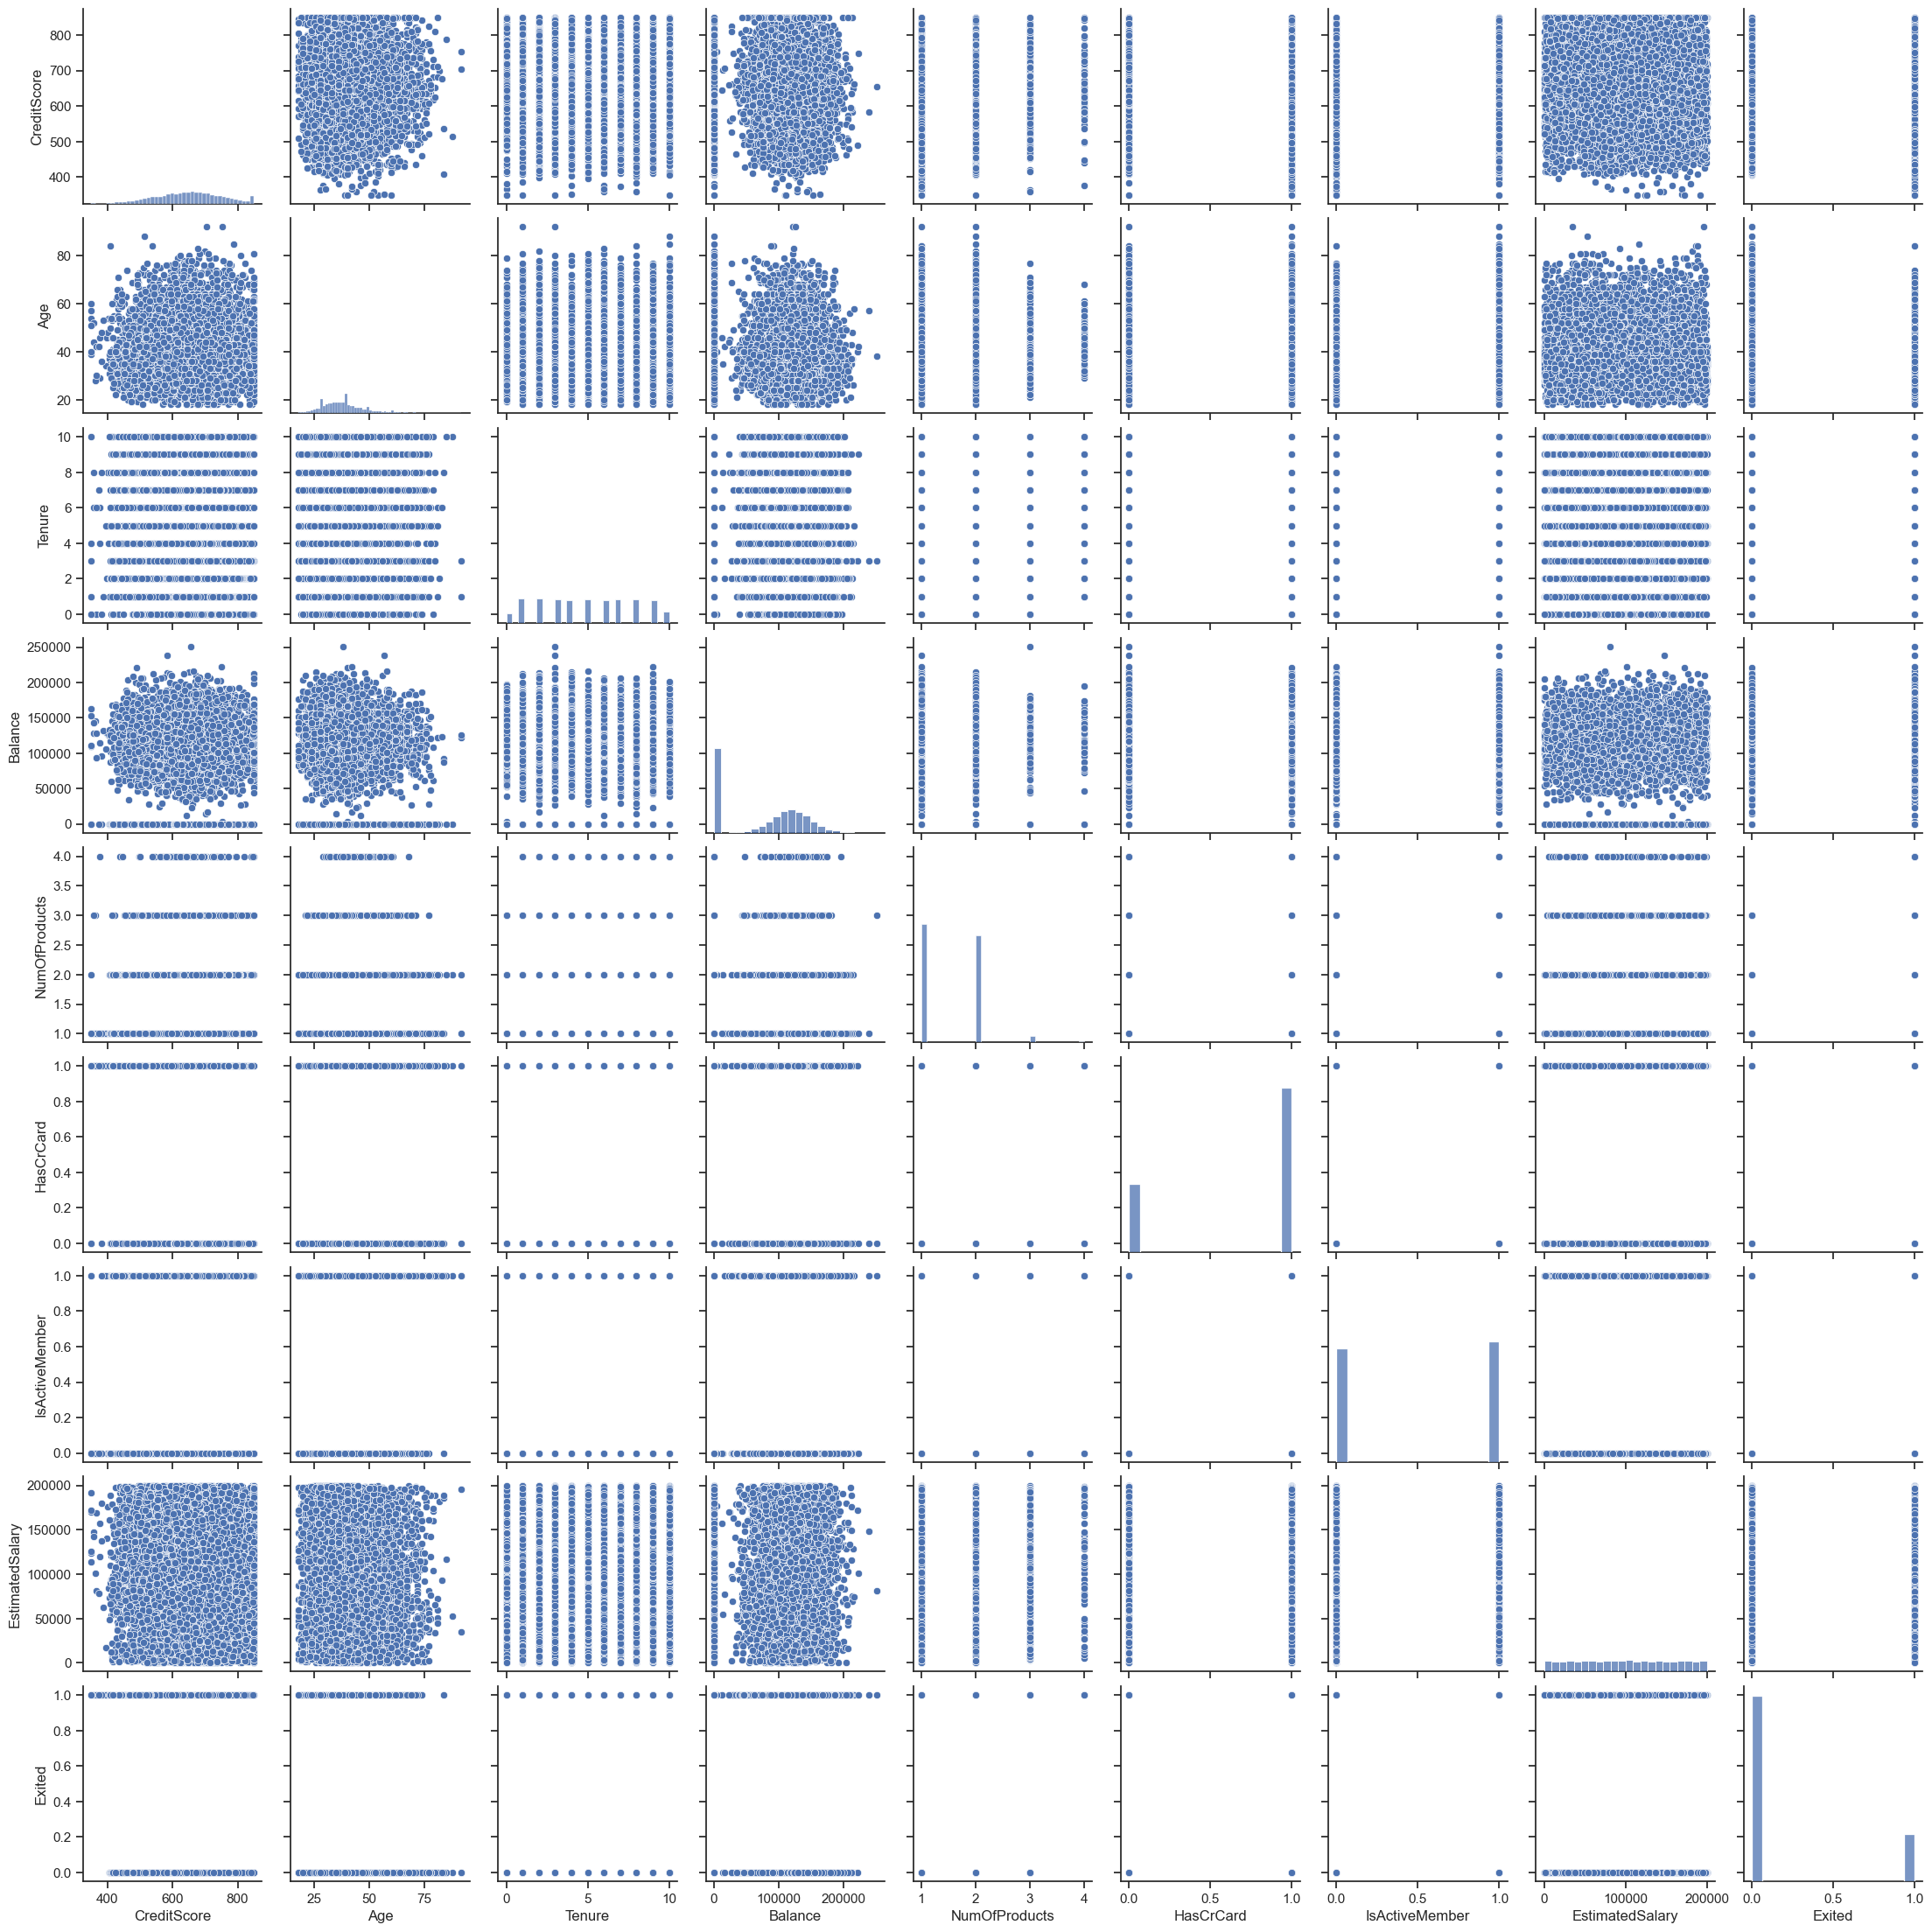

In [49]:
sns.pairplot(cm)
plt.show()

In [51]:
corr = cm_train.corr()

<AxesSubplot:>

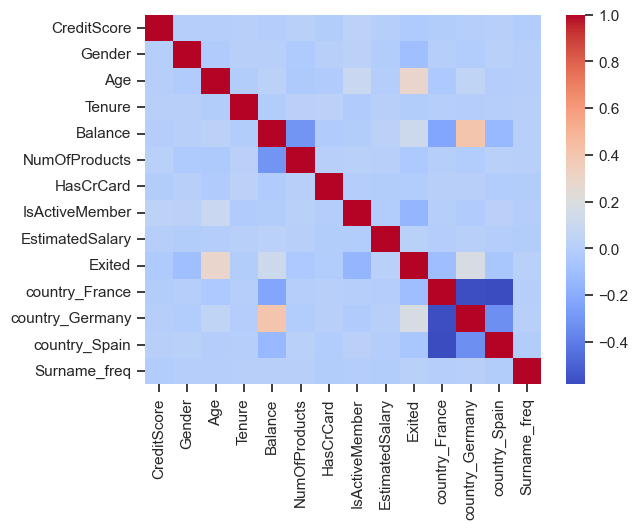

In [52]:
sns.heatmap(corr, cmap = 'coolwarm')

<AxesSubplot:xlabel='Exited', ylabel='Age'>

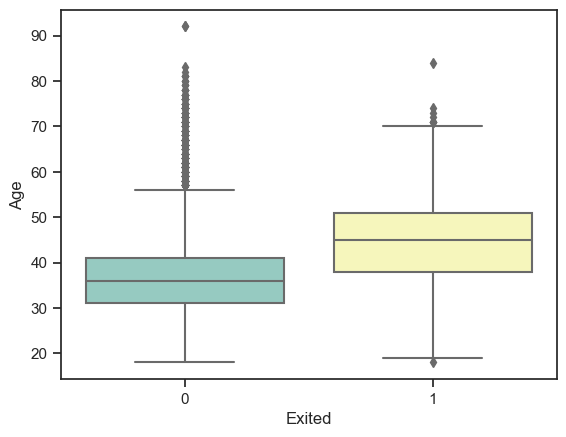

In [53]:
sns.boxplot(x="Exited", y="Age", data=cm_train, palette="Set3")

<AxesSubplot:xlabel='Exited', ylabel='Balance'>

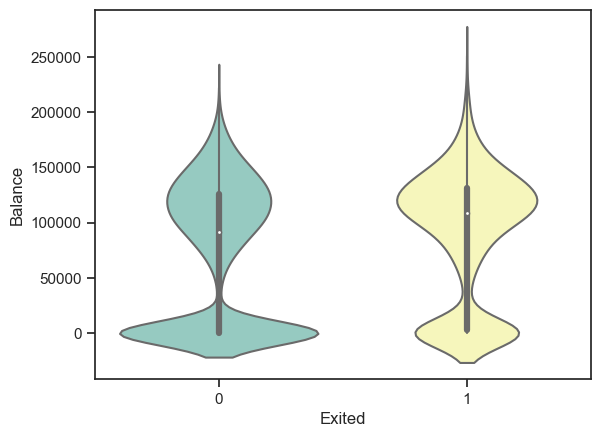

In [54]:
sns.violinplot(x="Exited", y="Balance", data=cm_train, palette="Set3")

In [55]:
cat_vars_bv = ['Gender', 'IsActiveMember', 'country_Germany', 'country_France']

for col in cat_vars_bv:
    cm_train.groupby([col]).Exited.mean()
    print()

In [56]:
col = 'NumOfProducts'
cm_train.groupby([col]).Exited.mean()
cm_train[col].value_counts()

1    4023
2    3629
3     223
4      45
Name: NumOfProducts, dtype: int64

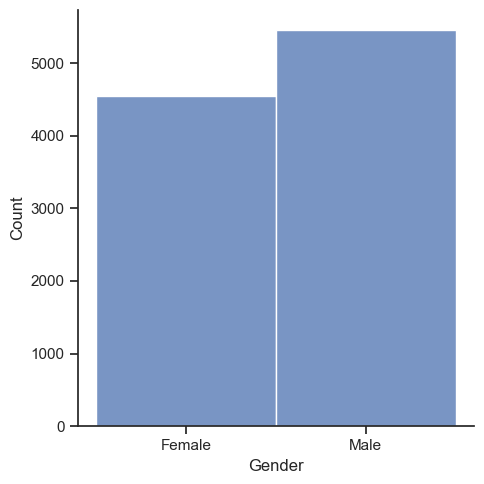

In [61]:
sns.displot(cm['Gender'])
plt.show()


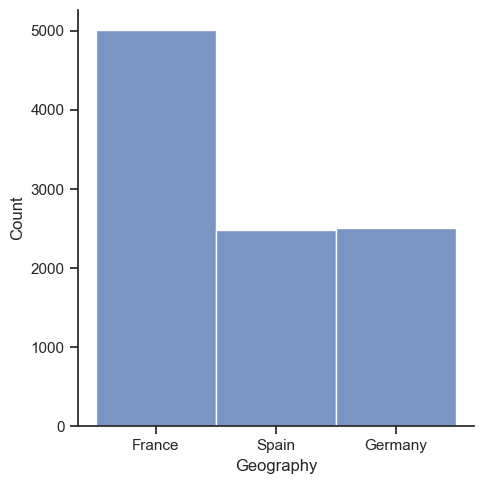

In [62]:
sns.displot(cm['Geography'])
plt.show()

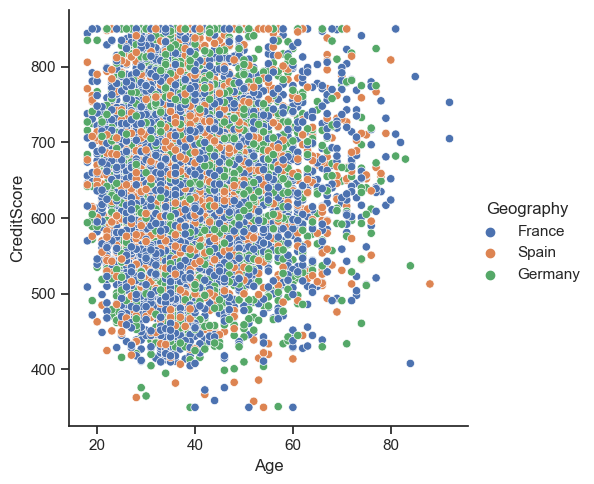

In [63]:
sns.relplot(x='Age', y='CreditScore', hue='Geography',data=cm)
plt.show()

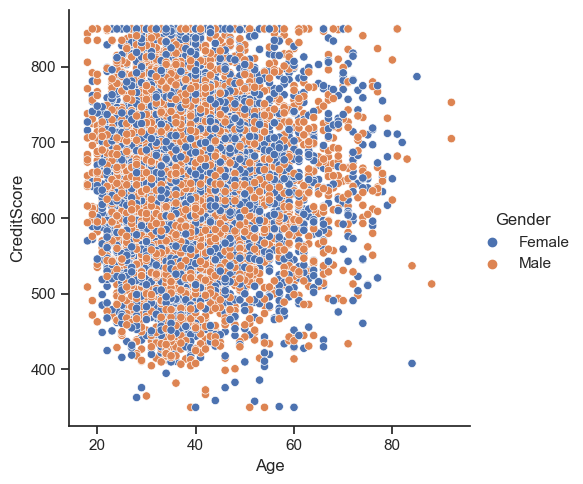

In [64]:
sns.relplot(x='Age', y='CreditScore', hue='Gender',data=cm)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tenure', ylabel='count'>

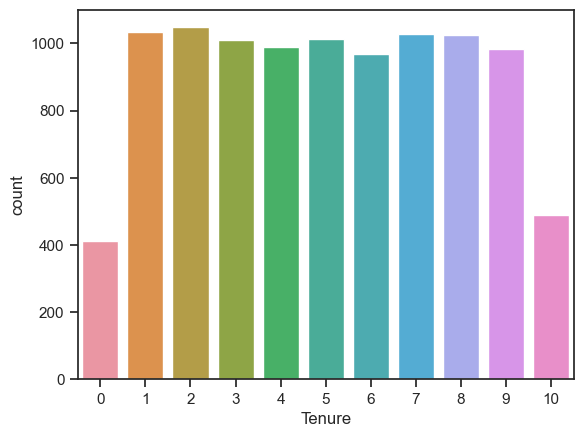

In [65]:
sns.countplot(cm['Tenure'])

In [66]:
cm.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [67]:
x =  cm[['Age', 'Tenure']]

In [68]:
y = cm['NumOfProducts']

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [70]:
model = LinearRegression()

In [71]:
model.fit(x_train, y_train)

LinearRegression()

In [72]:
print(model.coef_)

[-0.00161246  0.00261338]


In [73]:
print(model.intercept_)

1.5849390734004776


In [74]:
pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

,Coeff
Age,-0.001612
Tenure,0.002613


In [75]:
predictions = model.predict(x_test)

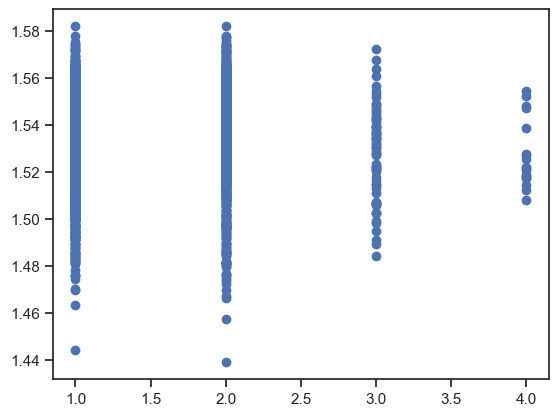

In [76]:
plt.scatter(y_test, predictions)
plt.show()

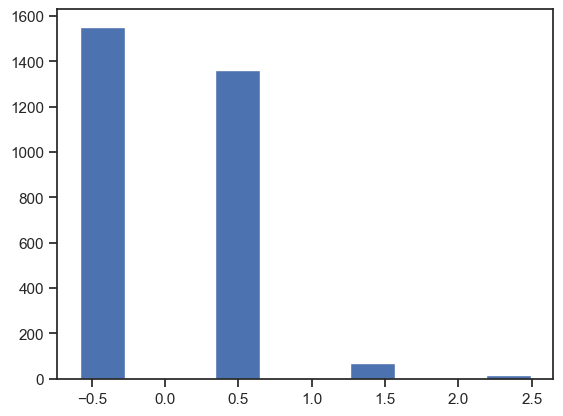

In [77]:
plt.hist(y_test - predictions)
plt.show()

In [78]:

metrics.mean_absolute_error(y_test, predictions)

0.535280942288391

In [79]:
metrics.mean_squared_error(y_test, predictions)

0.3321915109532701